# 1. Import Libraries

In [30]:
import numpy as np  # for matrices, vector operations
import pandas as pd  # for data frame operations
from sklearn.preprocessing import StandardScaler # for preprocessing, just scale data
import os # for file operations

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For training, NN.
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import Adam



## 2. Load Datasets

In [31]:
current_dir = os.getcwd()
datasets_dir = current_dir + '/dataset'

ds_train = datasets_dir +'/train.csv'
ds_dev = datasets_dir + '/dev.csv'
ds_test = datasets_dir + '/test.csv'

In [32]:
def load_dataset(dataset):
    '''
    Load dataset as pandas dataframe.
    '''
    dataset_frame = pd.read_csv(dataset)
    print(f"{dataset.split(sep='/')[-1]} is loaded")
    return dataset_frame

In [33]:
# Load datasets as dataframe
df_train = load_dataset(ds_train)
df_dev = load_dataset(ds_dev)
df_test = load_dataset(ds_test)

train.csv is loaded
dev.csv is loaded
test.csv is loaded


## 3. Data Analysis

In [34]:
df_train.head() # look first 5 row.

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,NaN,27.2450,426.0,NaN,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,NaN,27.2000,426.0,NaN,0.004757,1


In [35]:
# We can see that there are NaN values in df_train so let's look info about datasets.

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    7763 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            7633 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 445.4+ KB


In [37]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 145.9+ KB


In [38]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9752 entries, 0 to 9751
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 533.4+ KB


In [39]:
'''
# Train dataset : 
There are 8143 rows and 6 columns. It's mean we have 6 features which 5 of them is using to predict occupancy room.
Date feature's type is Object and others is numerical.

# Dev dataset : 
There are 2665 rows and 6 columns. It's mean we have 6 features which 5 of them is using to predict occupancy room.
Date feature's type is Object and others is numerical.

# Test dataset : 
There are 9752 rows and 6 columns. It's mean we have 6 features which 5 of them is using to predict occupancy room.
Date feature's type is Object and others is numerical.
'''

"\n# Train dataset : \nThere are 8143 rows and 6 columns. It's mean we have 6 features which 5 of them is using to predict occupancy room.\nDate feature's type is Object and others is numerical.\n\n# Dev dataset : \nThere are 2665 rows and 6 columns. It's mean we have 6 features which 5 of them is using to predict occupancy room.\nDate feature's type is Object and others is numerical.\n\n# Test dataset : \nThere are 9752 rows and 6 columns. It's mean we have 6 features which 5 of them is using to predict occupancy room.\nDate feature's type is Object and others is numerical.\n"

In [40]:
def isMissingValue(df,name):
  '''
  Input: an original data frame.
  Output : return yes or not answer.And if yes shows which class has nan values and their numbers.
  '''
  na_checker = df.isna().any().sum()
  if na_checker > 0:
    print("Are there any missing/NaN values in ",name,"set? : Yes")
    print("\n\tCounts")
    print(df.isna().sum())
  else:
    print("Are there any missing/NaN values in ",name,"set? : No ")

In [41]:
isMissingValue(df_train,'Train')
isMissingValue(df_dev,'Dev')
isMissingValue(df_test,'Test')

Are there any missing/NaN values in  Train set? : Yes

	Counts
date               0
Temperature      380
Humidity           0
Light              0
CO2              510
HumidityRatio      0
Occupancy          0
dtype: int64
Are there any missing/NaN values in  Dev set? : No 
Are there any missing/NaN values in  Test set? : No 


In [42]:
'''
We can see there are missing values in train dataset. Other datasets have not missing values.
So let's fill missing values in train dataset.
'''

"\nWe can see there are missing values in train dataset. Other datasets have not missing values.\nSo let's fill missing values in train dataset.\n"

## 4. Data Preprocessing

In [43]:
def divide_dataset(dataset,cols_X,col_y):
    '''
    This function split our dataset as X and y. 
    Input : the dataset path.
    '''
    X = pd.read_csv(dataset,sep=',',usecols = cols_X)
    y = pd.read_csv(dataset,sep=',',usecols = col_y)
    print(f"{dataset.split(sep='/')[-1]} is splitted as X and y")
    return X,y

cols_X = ['date','Temperature','Humidity','Light','CO2','HumidityRatio']
col_y = ['Occupancy']

df_train_X,df_train_y = divide_dataset(ds_train,cols_X,col_y)
df_dev_X,df_dev_y = divide_dataset(ds_dev,cols_X,col_y)
df_test_X,df_test_y = divide_dataset(ds_test,cols_X,col_y)


train.csv is splitted as X and y
dev.csv is splitted as X and y
test.csv is splitted as X and y


In [44]:
def fillAsMean(df,missing_features):
    '''
    Inputs:
    df -- A dataframe has missing values
    missing_features -- column names of the data frame
    
    Outputs:
    return dataframe has no missing values , it's mean filled dataframe.
    '''
    size = len(missing_features)
    for i in range(size):
      feature_name = missing_features[i]
      avg = np.mean(df.get(feature_name)) 
      df[feature_name] = df[feature_name].fillna(avg)
      print(f'Missing values are filled with average of {feature_name} columns.')
    return df

In [45]:
missing_features = ['Temperature','CO2']

df_train_X = fillAsMean(df_train_X,missing_features)

Missing values are filled with average of Temperature columns.
Missing values are filled with average of CO2 columns.


In [46]:
df_train_X.isna().any()

date             False
Temperature      False
Humidity         False
Light            False
CO2              False
HumidityRatio    False
dtype: bool

In [47]:
df_dev_X.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027
std,1.028024,2.436842,250.210906,292.681718,0.000611
min,20.200000,22.100000,0.000000,427.500000,0.003303
25%,20.650000,23.260000,0.000000,466.000000,0.003529
50%,20.890000,25.000000,0.000000,580.500000,0.003815
75%,22.356667,26.856667,442.500000,956.333333,0.004532
max,24.408333,31.472500,1697.250000,1402.250000,0.005378


In [48]:
df_test_X.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832,0.004589
std,1.020693,3.952844,208.221275,297.096114,0.000531
min,19.500000,21.865000,0.000000,484.666667,0.003275
25%,20.290000,26.642083,0.000000,542.312500,0.004196
50%,20.790000,30.200000,0.000000,639.000000,0.004593
75%,21.533333,32.700000,208.250000,831.125000,0.004998
max,24.390000,39.500000,1581.000000,2076.500000,0.005769


In [49]:
'''
Above, we can see min,max,mean,std and count values.Also,We can't see date column above.
Because Date column's type is Object. If we trained our model, 
this column will be used as training . 
So we should convert datetime to numeric.
'''
df_train_X.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
dtype: object

In [50]:
def dateTimeConverter(df):
  '''
  Input: df -- a dataframe will be converted to datetime. 
  Output: return df -- the dataframe's datetime column is converted  as numeric.
  '''
  try:
    df["date"] = pd.to_datetime(df["date"])
    df["date"] = pd.Float64Index(df["date"])
    print("Date time converting process is successed.")
  except:
    print("Exception Occured Step: Datetime Convert!")
  return df


In [51]:
df_train_X = dateTimeConverter(df_train_X)
df_dev_X = dateTimeConverter(df_dev_X)
df_test_X = dateTimeConverter(df_test_X)

Date time converting process is successed.
Date time converting process is successed.
Date time converting process is successed.


/var/folders/2n/215z1l7501174_bngr0ljz280000gn/T/ipykernel_3759/680037387.py:8: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  df["date"] = pd.Float64Index(df["date"])
/var/folders/2n/215z1l7501174_bngr0ljz280000gn/T/ipykernel_3759/680037387.py:8: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  df["date"] = pd.Float64Index(df["date"])
/var/folders/2n/215z1l7501174_bngr0ljz280000gn/T/ipykernel_3759/680037387.py:8: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  df["date"] = pd.Float64Index(df["date"])


In [52]:
df_train_X.dtypes

date             float64
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
dtype: object

In [53]:
def trundle(df,features):
  '''
  Inputs : df -- a dataframe has values will rounded.
          feature_name -- column name has values will rounded.
  Output: return df -- a dataframe has rounded values.
  '''
  for feature_name in features:
    df[feature_name] = round(df[feature_name],5)
    print(feature_name," Rounded operation is successful !")
  print("\n\n")
  return df

In [54]:
features = df_train_X.columns
df_train_X = trundle(df_train_X,features)
df_dev_X = trundle(df_dev_X,features)
df_test_X = trundle(df_test_X,features)

date  Rounded operation is successful !
Temperature  Rounded operation is successful !
Humidity  Rounded operation is successful !
Light  Rounded operation is successful !
CO2  Rounded operation is successful !
HumidityRatio  Rounded operation is successful !



date  Rounded operation is successful !
Temperature  Rounded operation is successful !
Humidity  Rounded operation is successful !
Light  Rounded operation is successful !
CO2  Rounded operation is successful !
HumidityRatio  Rounded operation is successful !



date  Rounded operation is successful !
Temperature  Rounded operation is successful !
Humidity  Rounded operation is successful !
Light  Rounded operation is successful !
CO2  Rounded operation is successful !
HumidityRatio  Rounded operation is successful !





In [55]:
df_train_X

,date,Temperature,Humidity,Light,CO2,HumidityRatio
0,1.423072e+18,23.18000,27.2720,426.0,721.25000,0.00479
1,1.423072e+18,23.15000,27.2675,429.5,714.00000,0.00478
2,1.423072e+18,20.57617,27.2450,426.0,604.03209,0.00478
3,1.423072e+18,23.15000,27.2000,426.0,708.25000,0.00477
4,1.423072e+18,20.57617,27.2000,426.0,604.03209,0.00476
...,...,...,...,...,...,...
8138,1.423561e+18,21.05000,36.0975,433.0,787.25000,0.00558
8139,1.423561e+18,21.05000,35.9950,433.0,789.50000,0.00556
8140,1.423561e+18,21.10000,36.0950,433.0,798.50000,0.00560
8141,1.423561e+18,21.10000,36.2600,433.0,820.33333,0.00562


In [56]:
'''
add functions is taken same input and return same output.
Input : df -- our real dataframe.
Output : return another dataframe. The dataframe has new feature.
'''
def add_TempLight(df):
  df_has_new_feature = df
  df_has_new_feature.columns = df.columns
  try:
    df_has_new_feature['Temp*Light']=df_has_new_feature['Temperature'] * (df_has_new_feature)["Light"]
    print("Temp x Ligth feature is added !")
  except:
    print("Exception occured: Co2 x HR feature is NOT added !")
  return (df_has_new_feature)

def add_CO2Temp(df):
  df_has_new_feature = df
  df_has_new_feature.columns = df.columns
  try:
    df_has_new_feature['CO2*Temp']=df_has_new_feature['CO2'] * (df_has_new_feature)["Temperature"]
    print("Co2 x Temperature feature is added !")
  except:
    print("CO2 x Temperature feature is NOT added !")
  return (df_has_new_feature)


In [57]:
# Add new Features All Datasets.
print("Train-Set")
train_X = add_TempLight(df_train_X)
train_X = add_CO2Temp(df_train_X)
print("\nDev-Set")
dev_X = add_TempLight(df_dev_X)
dev_X = add_CO2Temp(df_dev_X)
print("\nTest-Set")
test_X = add_TempLight(df_test_X)
test_X = add_CO2Temp(df_test_X)

Train-Set
Temp x Ligth feature is added !
Co2 x Temperature feature is added !

Dev-Set
Temp x Ligth feature is added !
Co2 x Temperature feature is added !

Test-Set
Temp x Ligth feature is added !
Co2 x Temperature feature is added !


In [58]:
'''
Scaling - I will use StandardScaler.StandardScaler is using Z-Score , 
z = (x-u) /s
x is our actual data. 
u is our data's mean. If with_mean = False will be 0(etkisiz eleman) . 
s is our data's standart deviation. If with_std = False will be 1(etkisiz eleman).
'''
scaler = StandardScaler()
def df_scaler(df,name):
  '''
  Input : df - dataframe
          name - dataframe's name.
  Output : df - dataframe is scaled.
  '''
  try:
    df_scaled = scaler.fit_transform(df)
    df = pd.DataFrame(df_scaled,columns=df.columns)
    print(name,"is scaled successfully!")
  except:
    print("Exception occured step: Train Scaling!")
  return df

In [59]:
train_X_scaled = df_scaler(train_X,'Train')
dev_X_scaled = df_scaler(dev_X,'Dev')
test_X_scaled = df_scaler(test_X,'Test')

Train is scaled successfully!
Dev is scaled successfully!
Test is scaled successfully!


In [60]:
train_X

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Temp*Light,CO2*Temp
0,1.423072e+18,23.18000,27.2720,426.0,721.25000,0.00479,9874.68000,16718.575000
1,1.423072e+18,23.15000,27.2675,429.5,714.00000,0.00478,9942.92500,16529.100000
2,1.423072e+18,20.57617,27.2450,426.0,604.03209,0.00478,8765.44842,12428.666969
3,1.423072e+18,23.15000,27.2000,426.0,708.25000,0.00477,9861.90000,16395.987500
4,1.423072e+18,20.57617,27.2000,426.0,604.03209,0.00476,8765.44842,12428.666969
...,...,...,...,...,...,...,...,...
8138,1.423561e+18,21.05000,36.0975,433.0,787.25000,0.00558,9114.65000,16571.612500
8139,1.423561e+18,21.05000,35.9950,433.0,789.50000,0.00556,9114.65000,16618.975000
8140,1.423561e+18,21.10000,36.0950,433.0,798.50000,0.00560,9136.30000,16848.350000
8141,1.423561e+18,21.10000,36.2600,433.0,820.33333,0.00562,9136.30000,17309.033263


In [61]:
# Scale All Datasets.
train_X_scaled_final = df_scaler(train_X,'Train')
dev_X_scaled_final = df_scaler(dev_X,'Dev')
test_X_scaled_final = df_scaler(test_X,'Test')

Train is scaled successfully!
Dev is scaled successfully!
Test is scaled successfully!


In [62]:
train_ds = pd.merge(train_X_scaled_final,df_train_y,left_index=True,right_index=True)
dev_ds = pd.merge(dev_X_scaled_final,df_dev_y,left_index=True,right_index=True)
test_ds = pd.merge(test_X_scaled_final,df_test_y,left_index=True,right_index=True)

# 5. Data Visualization

In [63]:
def showAllCounts():
    df_train_counts = list(df_train[df_train.columns].count())
    df_dev_counts = list(df_dev[df_dev.columns].count())
    df_test_counts = list(df_test[df_test.columns].count())
    df_all_counts = [df_train_counts,df_dev_counts,df_test_counts]

    colNames = df_train.columns

    fig = plt.figure(figsize=(20,5))
    plt.bar(colNames,df_all_counts[0],color='c',width=0.30,label='Train',align='center')
    plt.bar(colNames,df_all_counts[1],color='m',width=0.25,label='Dev',align='edge')
    plt.bar(colNames,df_all_counts[2],color='y',width=0.15,label='Test',align='edge')
    plt.legend(loc='best')
    plt.title('Dataset Feature Counts',size=16)
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.show()

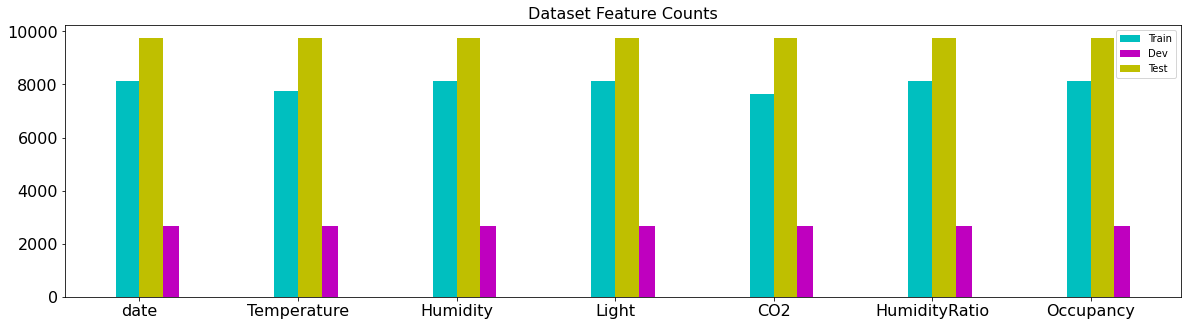

In [64]:
showAllCounts()

In [65]:
def showMissingRates():
    missing_temp = df_train.Temperature.isna().sum()
    missing_co2 = df_train.CO2.isna().sum()
    missing_counts = df_train.isna().sum()
    
    all_missing = missing_temp + missing_co2
    not_missing = len(df_train) - all_missing
    
    labels = ['Missing','Not Missing']
    data = [all_missing,not_missing]
    fig = plt.figure(figsize=(10,7))
    plt.pie(data,labels=labels,shadow=True,autopct='%1.1f%%')
    plt.title('Missing/Not Missing Rates',size=16)
    plt.show()
    
    plt.bar(df_train.columns,missing_counts)
    plt.xticks(rotation=90,size=15)
    plt.yticks(size=15)
    plt.title("Missings Counts",size=15)
    plt.show()

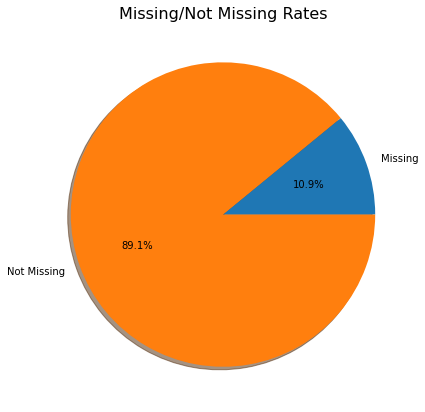

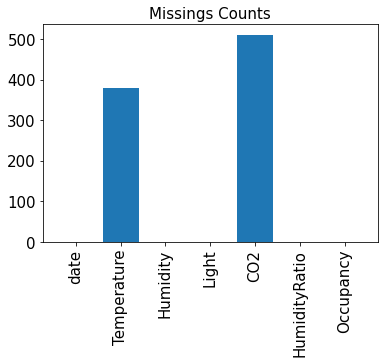

In [66]:
showMissingRates()

In [67]:
 '''
 Occupancy ile Feature'ların arasındaki ilişkilerin olduğu grafik.
 Mesela - CO2 - Occupancy
         Temperature - Occupancy
         ..
         ..
 '''

"\nOccupancy ile Feature'ların arasındaki ilişkilerin olduğu grafik.\nMesela - CO2 - Occupancy\n        Temperature - Occupancy\n        ..\n        ..\n"

In [68]:
train_corr = pd.merge(train_X,df_train_y,left_index=True,right_index=True).corr()
dev_corr = pd.merge(dev_X,df_dev_y,left_index=True,right_index=True).corr()
test_corr = pd.merge(test_X,df_test_y,left_index=True,right_index=True).corr()

In [69]:
def correlationGraph(dataset,ds_name):
    plt.figure(figsize=(12,8))
    sns.heatmap(dataset,annot=True,linewidth=.5)
    plt.title(f' Correlation of features in {ds_name} dataset', fontsize=16)

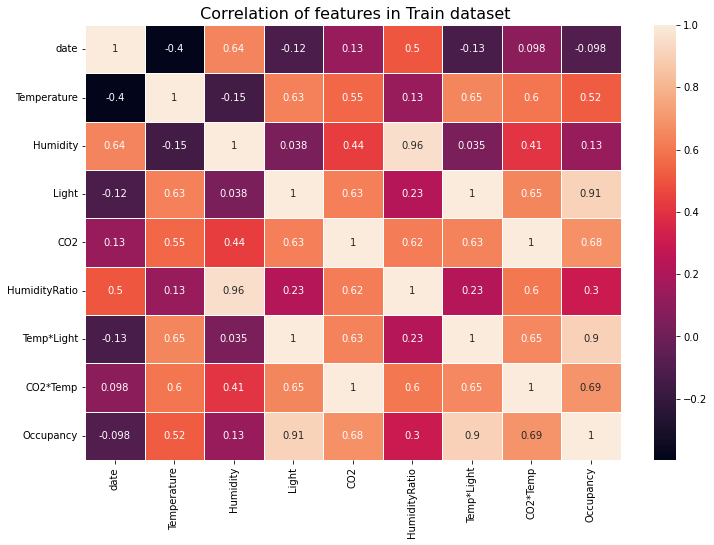

In [70]:
correlationGraph(train_corr,'Train')

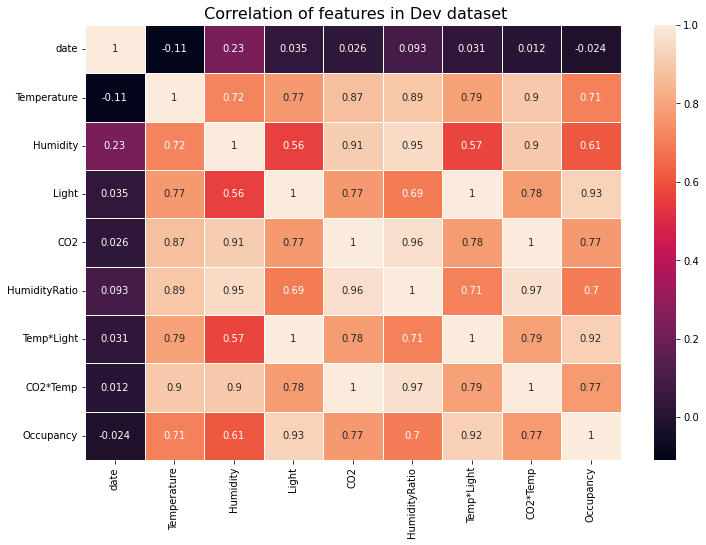

In [71]:
#Correlation of dev_X-y features with each other.
correlationGraph(dev_corr,'Dev')

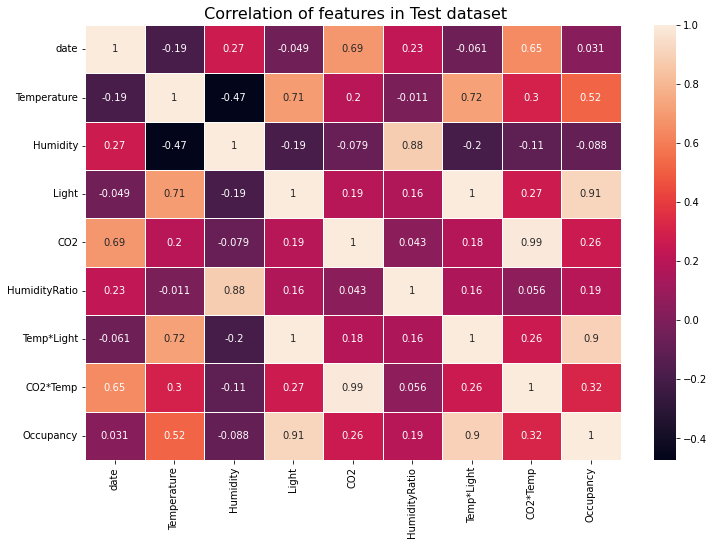

In [72]:
#Correlation of test_X- features with each other.
correlationGraph(test_corr,'Test')

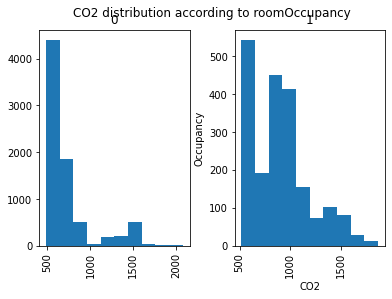

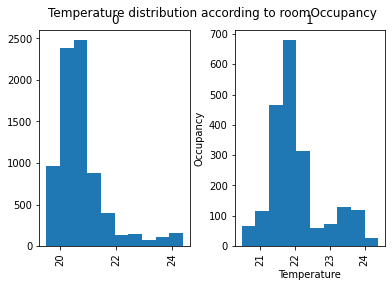

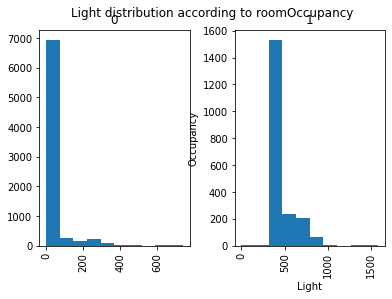

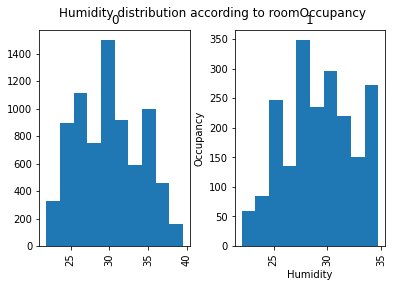

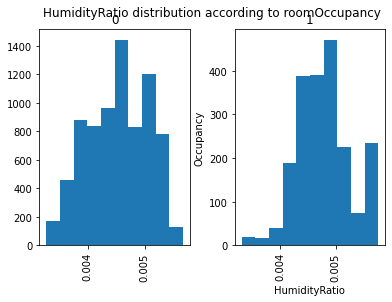

In [73]:
def fonk(a,b):
    not_missing = df_test[(df_test[a].notnull())]
    not_missing.hist(column = a, by=b)
    plt.xlabel(a)
    plt.ylabel(b)
    plt.suptitle(a + " distribution according to room" +b)
fonk('CO2', 'Occupancy')
fonk('Temperature', 'Occupancy')
fonk('Light','Occupancy')
fonk('Humidity', 'Occupancy')
fonk('HumidityRatio', 'Occupancy')

## 6. Training

In [74]:
X_train = train_X_scaled_final
y_train = df_train_y
X_dev = dev_X_scaled_final
y_dev = df_dev_y
X_test = test_X_scaled_final
y_test = df_test_y

opt = Adam(learning_rate=1e-6)

model = Sequential()
model.add(Dense(20,input_dim=X_train.shape[1], activation = 'relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss='binary_crossentropy',optimizer = opt,metrics=['accuracy'])
model.summary()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-04-10 21:00:55.625963: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-10 21:00:55.626300: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 2)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [75]:
history = model.fit(X_train,y_train,verbose=1,epochs=200,validation_data = (X_dev,y_dev))

Epoch 1/200


2023-04-10 21:00:56.156829: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-10 21:00:56.401098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


255/255 [==============================] - ETA: 0s - loss: 0.7131 - accuracy: 0.2110

2023-04-10 21:01:00.792378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


255/255 [==============================] - 5s 10ms/step - loss: 0.7131 - accuracy: 0.2110 - val_loss: 0.6919 - val_accuracy: 0.3017
Epoch 2/200
255/255 [==============================] - 2s 9ms/step - loss: 0.7125 - accuracy: 0.2113 - val_loss: 0.6914 - val_accuracy: 0.3017
Epoch 3/200
255/255 [==============================] - 2s 8ms/step - loss: 0.7120 - accuracy: 0.2113 - val_loss: 0.6909 - val_accuracy: 0.3017
Epoch 4/200
255/255 [==============================] - 2s 9ms/step - loss: 0.7114 - accuracy: 0.2116 - val_loss: 0.6904 - val_accuracy: 0.3017
Epoch 5/200
255/255 [==============================] - 2s 9ms/step - loss: 0.7108 - accuracy: 0.2128 - val_loss: 0.6899 - val_accuracy: 0.3017
Epoch 6/200
255/255 [==============================] - 2s 8ms/step - loss: 0.7102 - accuracy: 0.2129 - val_loss: 0.6894 - val_accuracy: 0.3017
Epoch 7/200
255/255 [==============================] - 2s 8ms/step - loss: 0.7096 - accuracy: 0.2132 - val_loss: 0.6889 - val_accuracy: 0.3017
Epoch 8/20

In [76]:
hist_test = model.evaluate(X_test,y_test) # accuracy on test set

305/305 [==============================] - 2s 5ms/step - loss: 0.6263 - accuracy: 0.8442


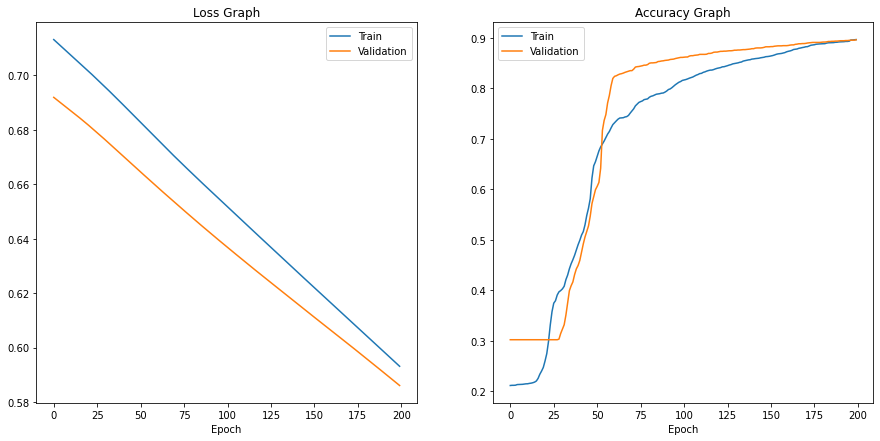

In [77]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(15, 7)
ax[0].plot(history.history['loss'],label='Train')
ax[0].plot(history.history['val_loss'],label='Validation')
ax[0].set_title('Loss Graph')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc='best')

ax[1].plot(history.history['accuracy'],label='Train')
ax[1].plot(history.history['val_accuracy'],label='Validation')
ax[1].set_title('Accuracy Graph')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='best')

In [78]:
model.save('mymodel.h5')